!pip install quandl

In [0]:
# importing libraries
import quandl as qd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#qd.ApiConfig.api_key = ''
import numpy as np

In [0]:
dataset = qd.get("BITSTAMP/USD").to_csv('Bitcoin.csv') #importing bitcoin dataframe from quandl and saving it to csv file for later use

In [4]:
df = pd.read_csv('Bitcoin.csv',parse_dates=True,index_col=0) #The dataes were previously prased but to increase usibility param are given
df.rename(columns = {'Last':'Close'},inplace=True)
df.head()

,High,Low,Close,Bid,Ask,Volume,VWAP
Date,,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22


In [5]:
short = int(input('Enter the short window size '))
long = int(input('Enter the long window size '))

Enter the short window size 50
Enter the long window size 100


In [0]:
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

In [0]:
signals['short_mavg'] = df['Close'].rolling(window=short, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long, min_periods=1, center=False).mean()

In [0]:
signals['signal'][short:] = np.where(signals['short_mavg'][short:]
> signals['long_mavg'][short:], 1.0, 0.0) 

In [0]:
signals['positions'] = signals['signal'].diff()

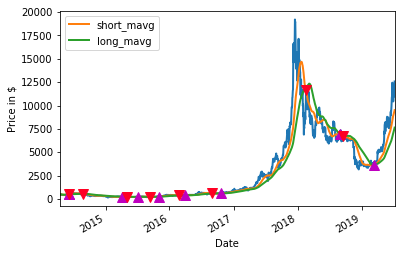

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price in $')
df['Close'].plot(ax=ax1, lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index,
signals.short_mavg[signals.positions == 1.0],
'^', markersize=10, color='m') 
ax1.plot(signals.loc[signals.positions == -1.0].index,
signals.short_mavg[signals.positions == -1.0],
'v', markersize=10, color='#FF0023') 